## Task 3

##### Relevant Inputs

In [1]:
# import relevant libraries

import numpy as np
import pandas as pd

# for splitting into training and test set
from sklearn.model_selection import train_test_split 

# for SVM
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# for random forest
from sklearn.ensemble import RandomForestClassifier

# for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# for visualization
import matplotlib.pyplot as plt

In [2]:
# import the dataset
df = pd.read_csv("data.csv", index_col=0) # user should be index of each row

##### EDA and Preprocessing of the Data

In [3]:
# inspect the first rows of the dataset
df.head()

,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,Digg,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
dmp923122274,0,0,2,0,0,3,6,0,0,0,...,0,0,0,4,0,0,1,0,1,0
dmp458034174,0,3,0,0,0,0,1,0,0,0,...,0,0,0,12,0,2,2,12,0,0
dmp364043571,0,2,0,0,0,0,0,0,2,0,...,0,0,0,11,0,0,0,0,0,0
dmp461339655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,22,0,0
dmp549691332,0,0,0,0,0,5,7,0,0,5,...,0,0,1,0,0,0,1,0,0,0


In [4]:
# inspect other aspects as well
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, dmp923122274 to dmp521609268
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Addthis        10000 non-null  int64 
 1   Bebo           10000 non-null  int64 
 2   Blogcatalog    10000 non-null  int64 
 3   Blogger        10000 non-null  int64 
 4   Buddymedia     10000 non-null  int64 
 5   Cnet           10000 non-null  int64 
 6   Conduit        10000 non-null  int64 
 7   Customerlobby  10000 non-null  int64 
 8   Delicious      10000 non-null  int64 
 9   Digg           10000 non-null  int64 
 10  Diigo          10000 non-null  object
 11  Docs           10000 non-null  int64 
 12  Docstoc        10000 non-null  int64 
 13  Download       10000 non-null  int64 
 14  Dropbox        10000 non-null  int64 
 15  Drupal         10000 non-null  int64 
 16  Epinions       10000 non-null  int64 
 17  Evernote       10000 non-null  int64 
 18  Facebook     

There are columns which are not numeric!

In [5]:
# identify these columns automatically
df.select_dtypes(["object"]).columns

Index(['Diigo'], dtype='object')

In [6]:
# check values of this column
df["Diigo"].value_counts()

0                         8842
Error: value not found     642
1                          332
2                          183
3                            1
Name: Diigo, dtype: int64

In [7]:
# replace "Error: value not found" with NaN
df.loc[df["Diigo"]=="Error: value not found","Diigo"] = np.nan

In [8]:
# check values again
df["Diigo"].value_counts()

0    8842
1     332
2     183
3       1
Name: Diigo, dtype: int64

In [9]:
# convert to a numeric column as well
df["Diigo"] = df["Diigo"].astype("float64")

In [10]:
# check distribution of each variable
df.describe()

,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,Digg,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.42250,0.78130,0.568100,2.823700,0.0,1.950400,2.142100,0.000200,0.393100,1.012700,...,0.41190,0.040200,0.293600,2.176900,0.459500,0.602200,0.380800,6.040600,0.206600,0.123400
std,1.01405,1.48899,1.197709,5.571438,0.0,2.937619,3.293993,0.014141,0.811319,2.266021,...,1.00436,0.196438,0.612402,3.691879,0.982169,1.194696,0.755413,7.892679,0.588856,0.328912
min,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,1.00000,0.000000,0.000000,0.0,4.000000,4.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
max,6.00000,8.00000,7.000000,28.000000,0.0,15.000000,16.000000,1.000000,4.000000,13.000000,...,7.00000,1.000000,3.000000,19.000000,5.000000,7.000000,4.000000,36.000000,4.000000,1.000000


In [11]:
# check if there are columns with less 0 impressions

left_outliers = []

for col in df.columns:
    if df[col].min()<0:
        left_outliers.append(col)

left_outliers

[]

There are no left outliers!

In [12]:
# check if there are columns with more than 1000 impressions

right_outliers = []

for col in df.columns:
    if df[col].max()>=1000:
        right_outliers.append(col)

right_outliers

['Newsvine']

In [13]:
# inspect this column
df["Newsvine"].max()

96372367637

In [14]:
df["Newsvine"].value_counts()

0              8443
1              1335
2               218
3                 3
96372367637       1
Name: Newsvine, dtype: int64

There is only one off value!

In [15]:
# replace max value with NaN
df.loc[df["Newsvine"]==df["Newsvine"].max(),"Newsvine"] = np.nan

In [16]:
df["Newsvine"].value_counts()

0.0    8443
1.0    1335
2.0     218
3.0       3
Name: Newsvine, dtype: int64

In [17]:
# check out columns with NaN and their amount

col_with_na = {}

for col in df.columns:
    if df[col].isna().sum()>0:
        col_with_na[col]=df[col].isna().sum()

col_with_na

{'Diigo': 642, 'Newsvine': 1}

Because most values of Diigo are 0 (8842 of 10,000), the decision is to take out this variable because there are a lot of NaN values after preprocessing and SVM cannot deal with NaNs. Also, the one observation of Newsvine should be removed due to the NaN value after preprocessing.

In [18]:
df = df.drop("Diigo", axis=1)
df = df.dropna()

In [19]:
# check ratio of users who clicked vs. didn't click on the advertisement
df["Click"].sum()/df["Click"].count() * 100

12.341234123412342

Only 12.34% of the data represents users who clicked on the advertisement. There are too less observations where a user clicked on the advertisement! Therefore, both models need a balancing of the target variable while training (class_weight="balanced")!

### 1.

##### Splitting into training and test set

In [20]:
# divide the data into features and target variable

X = df.drop("Click", axis=1)
y = df["Click"]

In [21]:
# split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Implement SVM 

In [22]:
# scale the data for SVM

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [23]:
# use hyperparameter tuning to identify optimal model of these possibilites

param_grid = {"C": [0.1, 1, 10, 100, 1000],  
              "gamma": [1, 0.1, 0.01, 0.001, 0.0001], 
              "kernel": ["rbf"]} 

In [24]:
# initiate SVM
# random_state for reproducibility
# class_weight="balanced" because the dataset is inbalanced
svm = SVC(random_state=42, class_weight="balanced")

In [25]:
# all different possibilities are trained using 5-fold cross validation over training set (no need for validation set therefore)
# literature suggests 5- or 10-fold cross validation as best
# after identifying the optimal SVM hyperparameters:
# a model is trained over best set of hyperparameters over whole training set and used for our predictions later 
grid_svm = GridSearchCV(estimator=svm, 
                        param_grid=param_grid, 
                        refit=True, verbose=3, 
                        cv=5, 
                        return_train_score=True)

In [26]:
# fitting the model for grid search
grid_svm.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.125, test=0.126) total time=   3.1s
[CV 2/5] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.125, test=0.126) total time=   2.8s
[CV 3/5] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.125, test=0.126) total time=   2.8s
[CV 4/5] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.125, test=0.126) total time=   2.9s
[CV 5/5] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.874, test=0.875) total time=   2.9s
[CV 1/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=0.125, test=0.126) total time=   3.1s
[CV 2/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=0.125, test=0.126) total time=   3.0s
[CV 3/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=0.125, test=0.126) total time=   3.0s
[CV 4/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=0.125, test=0.126) total time=   3.1s
[CV 5/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=0.874, test=0.875) total time=   3.0

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             return_train_score=True, verbose=3)

In [27]:
# print best parameter after tuning
print(grid_svm.best_params_)
  
# print how our model looks after hyperparameter tuning
print(grid_svm.best_estimator_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=100, class_weight='balanced', gamma=0.001, random_state=42)


In [28]:
# check scores on training set 

# get predictions on training set 
grid_predictions = grid_svm.predict(X_train_scaled)

#print confusion matrix
print("This is the confusion matrix \n",
      confusion_matrix(y_train, grid_predictions), "\n")

# print classification report 
# includes precision recall f1-score and support 
print(classification_report(y_train, grid_predictions))

This is the confusion matrix 
 [[6965   30]
 [   0 1004]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6995
           1       0.97      1.00      0.99      1004

    accuracy                           1.00      7999
   macro avg       0.99      1.00      0.99      7999
weighted avg       1.00      1.00      1.00      7999



In [29]:
# check scores on test set 

# get predictions on test set 
grid_predictions = grid_svm.predict(X_test_scaled)

#print confusion matrix
print("This is the confusion matrix \n",
      confusion_matrix(y_test, grid_predictions), "\n")

# print classification report 
# includes precision, recall, f1-score and support 
print(classification_report(y_test, grid_predictions))

This is the confusion matrix 
 [[1730   40]
 [  19  211]] 

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1770
           1       0.84      0.92      0.88       230

    accuracy                           0.97      2000
   macro avg       0.91      0.95      0.93      2000
weighted avg       0.97      0.97      0.97      2000



The f1-score on the unseen test set of the SVM is 97%. However, the performance predicting class 1 is lower due to the imbalance of the target variable in the dataset.

##### Implement Random Forest

In [30]:
# initiate random forest classifier
# random_state for reproducibility
rf = RandomForestClassifier(random_state=42, class_weight="balanced") 

In [31]:
# use hyperparameter tuning to identify optimal model of these possibilites

param_grid = {"n_estimators": [300, 500, 1000],
              "max_depth": [1, 3, 5, 10],
              "min_samples_split": [2, 4, 6, 8]}

In [32]:
# all different possibilities are trained using 5-fold cross validation over training set (no need for validation set therefore)
# literature suggests 5- or 10-fold cross validation as best
# after identifying the optimal random forest hyperparameters:
# a model is trained over best set of hyperparameters over whole training set and used for our predictions later
grid_rf = GridSearchCV(estimator=rf, 
                       param_grid=param_grid, 
                       refit=True, verbose=3, 
                       cv=5,
                       return_train_score=True)

In [33]:
# fitting the model for grid search
# not using scaled data because random forest has not this assumption
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END max_depth=1, min_samples_split=2, n_estimators=300;, score=(train=0.833, test=0.824) total time=   0.6s
[CV 2/5] END max_depth=1, min_samples_split=2, n_estimators=300;, score=(train=0.836, test=0.818) total time=   0.5s
[CV 3/5] END max_depth=1, min_samples_split=2, n_estimators=300;, score=(train=0.823, test=0.814) total time=   0.5s
[CV 4/5] END max_depth=1, min_samples_split=2, n_estimators=300;, score=(train=0.825, test=0.821) total time=   0.5s
[CV 5/5] END max_depth=1, min_samples_split=2, n_estimators=300;, score=(train=0.832, test=0.833) total time=   0.5s
[CV 1/5] END max_depth=1, min_samples_split=2, n_estimators=500;, score=(train=0.833, test=0.817) total time=   0.9s
[CV 2/5] END max_depth=1, min_samples_split=2, n_estimators=500;, score=(train=0.837, test=0.821) total time=   0.9s
[CV 3/5] END max_depth=1, min_samples_split=2, n_estimators=500;, score=(train=0.830, test=0.821) total time=   0.9s
[C

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [1, 3, 5, 10],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [300, 500, 1000]},
             return_train_score=True, verbose=3)

In [34]:
# print best parameter after tuning
print(grid_rf.best_params_)
  
# print how our model looks after hyperparameter tuning
print(grid_rf.best_estimator_)

{'max_depth': 10, 'min_samples_split': 8, 'n_estimators': 300}
RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=8, n_estimators=300, random_state=42)


In [35]:
# check scores on training set 

# get predictions on training set 
grid_predictions = grid_rf.predict(X_train)

#print confusion matrix
print("This is the confusion matrix \n",
      confusion_matrix(y_train, grid_predictions), "\n")

# print classification report 
# includes precision recall f1-score and support 
print(classification_report(y_train, grid_predictions))

This is the confusion matrix 
 [[6987    8]
 [  20  984]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6995
           1       0.99      0.98      0.99      1004

    accuracy                           1.00      7999
   macro avg       0.99      0.99      0.99      7999
weighted avg       1.00      1.00      1.00      7999



In [36]:
# check scores on test set 

# get predictions on test set 
grid_predictions = grid_rf.predict(X_test)

#print confusion matrix
print("This is the confusion matrix \n",
      confusion_matrix(y_test, grid_predictions), "\n")

# print classification report 
# includes precision, recall, f1-score, and support 
print(classification_report(y_test, grid_predictions))

This is the confusion matrix 
 [[1752   18]
 [ 172   58]] 

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1770
           1       0.76      0.25      0.38       230

    accuracy                           0.91      2000
   macro avg       0.84      0.62      0.66      2000
weighted avg       0.89      0.91      0.88      2000



The f1-score on the unseen test set of the random forest is 88%. However, the random forest classifier is not very good at predicting class 1 due to the unbalance of the target variable in the dataset.

##### Summary 

Previously, a SVM classifier and a random forest classifier was trained. After splitting the dataset into training and test set, the training set was used to search for suitable hyperparameters for each model using 3-fold cross validation. Therefore, no hold-out dataset had to be created. After training, the models were used to compare performance by predicting on the test set.

Comparing both algorithm, the SVM algorithm is better for this kind of supervised machine learning problem due to the unbalance of the dataset. The SVM is searching for a hyperplane to separate both classes, therefore, having ann unbalanced dataset can be kind of offset. The random forest suffers from this problem! 

SVM F1-score: 97% on test set!

Random forest F1-score: 88% on test set!

### 2.

In [37]:
def most_important_features(original_dataframe, rf_model):
    '''
    Input:
    original_dataframe: original dataframe used to train rf (used to extract feature names)
    rf_model: saved random forest model
    
    Output:
    Function prints out 5 most important features and plots them as barchart
    '''
    temp1 = []
    temp2 = []

    for name, score in zip(original_dataframe.columns, rf_model.best_estimator_.feature_importances_):
        temp1.append(name)
        temp2.append(score)

    dictionary = {"feature" : temp1, "relative_importance" : temp2}

    feature_importance = pd.DataFrame(dictionary).set_index("feature")

    feature_importance.sort_values(by="relative_importance", ascending=False, inplace=True)

    print("These are the 5 most important features according to the random forest model: \n")
    print(feature_importance[:5])

    # plot the features and their relative_importance
    plt.bar(list(feature_importance.index[:5]), feature_importance["relative_importance"][:5])
    plt.title("5 most important features according to random forest model")
    plt.xlabel("Marketing Channel")
    plt.ylabel("Relative Importance (in %)")
    plt.show()

These are the 5 most important features according to the random forest model: 

             relative_importance
feature                         
Wordpress               0.060989
Livejournal             0.058918
Thisnext                0.055135
Blogger                 0.050350
Yelp                    0.046696


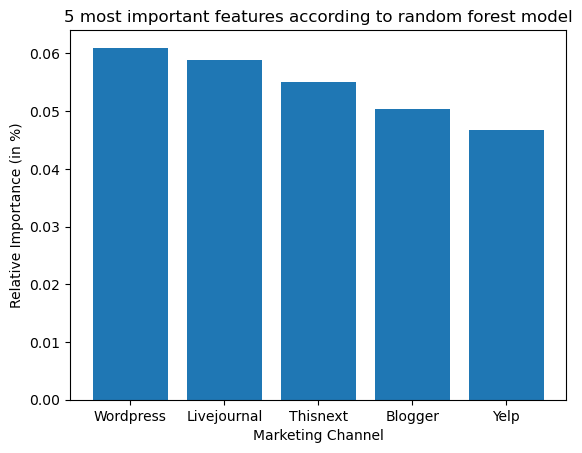

In [38]:
# use the function
most_important_features(df, grid_rf)

### 3.

If the company wants to use most effective channels, they should follow the most important features from the random forest model as these were the most crucial ones regarding efficiency:

In this case, the best channel is "Wordpress" (6.10% relative importance) followed by "Livejournal" (5.89% relative importance).

### 4.

If the cost of impressions are the same for all channels, the most efficient channels (fewer impressions per click) are best to choose.

Therefore, the answer is the same as in task 3. 